# Scraper for recipes (to migrate to EC2) 

In [1]:
import time
from urllib import urlencode  
from selenium import webdriver
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from bs4 import BeautifulSoup
import random
import requests
import pymongo
import pandas as pd
import re
import pickle
import boto3
import os
import collections
from IPython.display import Image

In [2]:
%matplotlib inline

In [3]:
client = pymongo.MongoClient("mongodb://localhost:27017/")

In [4]:
allrecipes_db = client.allrecipes

In [6]:
healthy_coll = allrecipes_db.healthy_recipes

In [85]:
#missing = list(recipes_coll.find({"name": []}, ["recipe_ID", "name", "directions_list"]))

In [86]:
#missing_ID = [a['recipe_ID'] for a in missing]

In [12]:
with open('healthy_recipe_id.txt', 'r') as f: healthy_recipes = list(f.readlines())

In [13]:
healthy_recipes = [a.strip() for a in healthy_recipes]

In [14]:
healthy_recipes = list(set(healthy_recipes))

In [15]:
len(healthy_recipes)

1190

In [7]:
# Access s3 bucket to use 
AWS_KEY = os.environ['AWS_ACCESS_KEY']
AWS_SECRET = os.environ['AWS_SECRET_ACCESS_KEY'] 

# Open s3 session with boto3
session = boto3.Session(aws_access_key_id=AWS_KEY, aws_secret_access_key=AWS_SECRET)
s3 = session.resource('s3')

mybucket = s3.Bucket('ohailolcat')

In [50]:
mybucket.upload_file?

In [16]:
# Use Firefox as browser
browser = webdriver.Firefox(firefox_binary=FirefoxBinary(
    firefox_path='/Applications/FirefoxESR.app/Contents/MacOS/firefox'
))

In [18]:
offset = 0

In [20]:
N = 1

In [9]:
I = 0

In [10]:
offset = N * 1000 + I 

In [22]:
offset = 1000

In [23]:
for i, a in enumerate(healthy_recipes[offset:N*1000+1000]):
    browser.get("http://allrecipes.com/recipe/{}/".format(a))
    print "list item number {}, {} \n  {}\n\n\n".format(i+offset, a, browser.current_url)
#    browser.execute_script("window.scrollTo(0, document.body.scrollHeight/1.2);")
    time.sleep(2 + random.random() * 5)
#     browser.save_screenshot('temp.png') 
#     mybucket.upload_file('temp.png', 'recipesh/recipe_{}.png'.format(a))
    with open("temp.pkl", 'wb') as f: pickle.dump(browser.page_source, f)
    mybucket.upload_file('temp.pkl', 'recipesh/recipe_{}.pkl'.format(a))
    healthy_coll.insert_one({"page":[browser.page_source]})
    I = i 
    

list item number 1000, 91914 
  http://allrecipes.com/recipe/91914/ts-sweet-potato-fries/



list item number 1001, 17048 
  http://allrecipes.com/recipe/17048/garlic-shrimp-linguine/



list item number 1002, 23723 
  http://allrecipes.com/recipe/23723/imitation-meatloaf/



list item number 1003, 23173 
  http://allrecipes.com/recipe/23173/albino-pasta/



list item number 1004, 20610 
  http://allrecipes.com/recipe/20610/apple-banana-smoothie/



list item number 1005, 162003 
  http://allrecipes.com/recipe/162003/snow-on-the-mountain-green-beans/



list item number 1006, 55813 
  http://allrecipes.com/recipe/55813/summer-berry-parfait-with-yogurt-and-granola/



list item number 1007, 53935 
  http://allrecipes.com/recipe/53935/chinese-pork-tenderloin/



list item number 1008, 42966 
  http://allrecipes.com/recipe/42966/elk-chili/



list item number 1009, 1259 
  http://allrecipes.com/recipe/1259/



list item number 1010, 79828 
  http://allrecipes.com/recipe/79828/apple-cinnam

In [67]:
personal_recipes = [a for a in recipes_orderedset.keys() if int(a) > 1000000]

In [97]:
N = 'm'

In [98]:
missing_ID[:10]

[u'62136309',
 u'62266142',
 u'62284038',
 u'62429382',
 u'62507803',
 u'63026054',
 u'63224955',
 u'63227970',
 u'63630960',
 u'63696460']

In [99]:
offset = 0

In [100]:
missing_personal = filter(lambda x: len(x)>6, missing_ID)

In [105]:
missing_notpersonal = list(set(missing_ID) - set(missing_personal))

In [106]:
personal_recipes = missing_notpersonal

In [107]:
for i, a in enumerate(personal_recipes[offset:]):

    browser.get("http://allrecipes.com/recipe/{}/".format(a))
    print "list item number {}, {} \n  {}\n\n\n".format(i+offset, a, browser.current_url)
#    browser.execute_script("window.scrollTo(0, document.body.scrollHeight/1.2);")
    time.sleep(2 + random.random() * 5)
#     browser.save_screenshot('temp.png') 
#     mybucket.upload_file('temp.png', 'recipes{}/recipe_{}.png'.format(str(N),a))
    with open("temp.pkl", 'wb') as f: pickle.dump(browser.page_source, f)
    mybucket.upload_file('temp.pkl', 'recipes{}/recipe_{}.pkl'.format(str(N),a))
    I = i 


list item number 0, 237608 
  http://allrecipes.com/recipe/237608/hibachi-style-fried-rice/



list item number 1, 85598 
  http://allrecipes.com/recipe/85598/gingery-carrot-salad/



list item number 2, 186119 
  http://allrecipes.com/recipe/186119/creamy-shrimp-scampi/



list item number 3, 16932 
  http://allrecipes.com/recipe/16932/lemon-poppy-seed-bread/



list item number 4, 45142 
  http://allrecipes.com/recipe/45142/cranberry-mango-bread/



list item number 5, 12221 
  http://allrecipes.com/recipe/12221/ham-and-cheese-quiche/



list item number 6, 231988 
  http://allrecipes.com/recipe/231988/twice-baked-potato-casserole-with-bacon/



list item number 7, 7215 
  http://allrecipes.com/recipe/7215/pumpkin-yeast-bread/



list item number 8, 25224 
  http://allrecipes.com/recipe/25224/classic-bran-muffins/



list item number 9, 57002 
  http://allrecipes.com/recipe/57002/pork-tenderloin-with-dijon-marsala-sauce/



list item number 10, 13351 
  http://allrecipes.com/recipe/1

In [108]:
browser.quit()

In [29]:
pwd

u'/Users/User1/DS/projects/food/src/data'

In [30]:
ls

__init__.py                        recipe_16073.pkl
aboutme.pkl                        recipe_16073.png
aboutme2.pkl                       recipe_228056.pkl
aboutme_page.ipynb                 recipe_228056.png
favorites_page.ipynb               recipe_23998.png
followers_page.ipynb               recipe_241213.pkl
following_page.ipynb               recipe_241213.png
geckodriver.log                    recipe_scrape_list.ipynb
lookit.py                          recipe_scraper-localmachine.ipynb
madeit_page.ipynb                  recipes_orderedset.pkl
mem.py                             reviews_page.ipynb
members.py                         scrape_for_reviews.py
memlist.txt                        scrape_for_reviews.pyc
ndb_to_mongo.py                    txt_to_mongo.py
ndb_to_mongo.pyc                   ubuntu@54.202.196.138
non-allrecipe reviews.ipynb        usda_food_items.ipynb


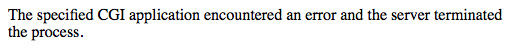

In [24]:
Image("temp.png")

In [27]:
mybucket

s3.Bucket(name='ohailolcat')